In [35]:
# Tweets are taken from the nltk library and then preprocessed
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
%matplotlib inline 

In [36]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [37]:
print(len(positive_tweets),len(negative_tweets),sep =' ')


5000 5000


In [38]:
# So 5000 +ve tweets and 5000 -ve tweets
#Tweets are stored in lists 
type(positive_tweets)

list

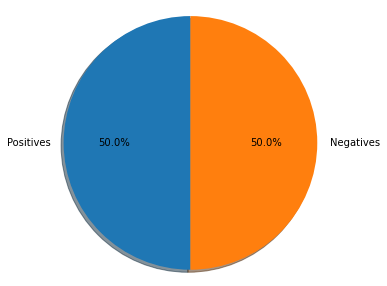

In [39]:
# Show the composition as a pie chart
fig = plt.figure(figsize = (5,5))

labels = 'Positives', 'Negatives'

sizes = [len(positive_tweets), len(negative_tweets)]

plt.pie(sizes,labels = labels , autopct = '%1.1f%%',shadow = True, startangle = 90)

plt.axis('equal')

plt.show()

In [40]:
#Print +ve texts in green and negative texts in red

print('\033[92m' + positive_tweets[random.randint(0,5000)])
print()
print('\033[91m' + negative_tweets[random.randint(0,5000)])

@ChrisBourne see you later :)

Expired and I used BIS money now I'm broke ):("@TheActualKing: @portiatearsbee you got BB where is your BIS?"


In [41]:
# Preprocessing text data involves 
# 1. Tokenisation
# 2. Lowercasing
# 3. Removing stop words 
# 4. Stemming

# import libraries
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [42]:
# considering a sample tweet 

tweet = positive_tweets[2277]
print('\033[92m' + tweet)
print('\033[94m')

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [43]:
# Since we are using twitter data ,\
# We shud remove hashtags, hyperlinks , retweet 

# Removing RT for a retweet
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [44]:
# Tokenization
print()
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False , strip_handles= True,reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)
print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [52]:
# # Removing of stop words
stopwords_english = stopwords.words('english') 

# print('Stop words\n')
# print(stopwords_english)

# print('\nPunctuation\n')
# print(string.punctuation)

In [53]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [54]:
# Stemming
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [55]:
# Combining all improvements into a single function
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False,        strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [56]:
tweet = positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
